# Hypergeometric Distribution Plots
Shows likelihood of finding a CTCF-connected gene associated with a given TF

Red line represents the observed number of AHDC1-dependent CTCF sites associated with given TF

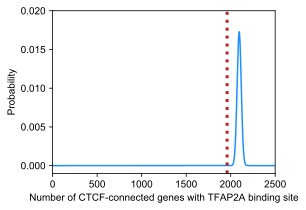

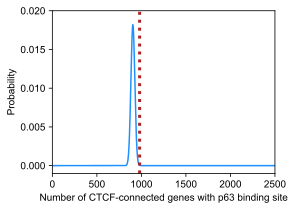

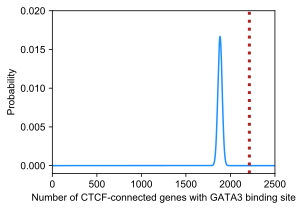

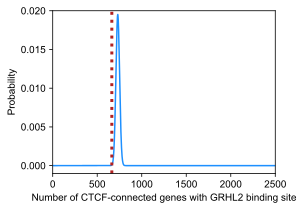

In [6]:
%matplotlib inline
%config InlineBackend.figure_format='svg'
from scipy.stats import hypergeom
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#observed = number of TF sites bound or looped to genes also bound and looped to AHDC1-dep CTCF
observed={'GATA3':2213,'TFAP2A':1960,'GRHL2':664,'p63':980}
#distribution = number of TF sites bound or looped to all protein coding TSS
distribution={'GATA3':7278,'TFAP2A':8099,'GRHL2':2824,'p63':3495}

#hypergeom number = total number of protein coding genes
#hypergeom second number = number of AHDC1-dep CTCF bound or looped TSS
for key in distribution:
    if distribution[key] != 0 :
        rv = hypergeom(12328,distribution[key],3190)
        x = np.arange(0, distribution[key]+1)
        pmf = rv.pmf(x)
        fig = plt.figure(figsize=(4,3))
        ax = fig.add_subplot(111)
        ax.plot(x, pmf, 'dodgerblue', markersize=2)
        ax.set_xlabel('Number of CTCF-connected genes with ' + key +' binding site')
        ax.set_ylabel('Probability')
        ax.set_xlim([0,2500])
        ax.set_ylim([-0.001,0.02])
        plt.axvline(x=observed[key],color='firebrick', linestyle='dotted', linewidth=3)
        plt.rcParams["font.family"] = "Arial"
        plt.show()
        fig.savefig(key + '_hypergeomtric.svg', bbox_inches = "tight")

# Fisher's Exact Tests
Tests whether the observed number of genes associated with both an AHDC1-dependent CTCF site and TF site is higher than random chance, based on the number of CTCF associated genes connected to TFs.


In [3]:
from scipy.stats import fisher_exact
from scipy.special import binom 

observed={'GATA3':2213,'TFAP2A':1960,'GRHL2':664,'p63':980} #aka "x" values
distribution={'GATA3':7278,'TFAP2A':8099,'GRHL2':2824,'p63':3495} #aka "n" values

for key in observed : 
    print(key, ':') 
    cont_table = []
    cont_table.append([observed[key], 3109 - observed[key]])
    cont_table.append([distribution[key],12328-distribution[key]])
    print(cont_table)
    fet = fisher_exact(cont_table)
    print("p value = ", fet[1])
    print("p value with Bonferroni correction = ", fet[1]*len(observed) , "\n")




('TFAP2A', ':')
[[1960, 1149], [8099, 4229]]
('p value = ', 0.00579520406034263)
('p value with Bonferroni correction = ', 0.02318081624137052, '\n')
('p63', ':')
[[980, 2129], [3495, 8833]]
('p value = ', 0.0005584169709230098)
('p value with Bonferroni correction = ', 0.002233667883692039, '\n')
('GATA3', ':')
[[2213, 896], [7278, 5050]]
('p value = ', 1.7464785815525324e-36)
('p value with Bonferroni correction = ', 6.98591432621013e-36, '\n')
('GRHL2', ':')
[[664, 2445], [2824, 9504]]
('p value = ', 0.06471883292213446)
('p value with Bonferroni correction = ', 0.2588753316885378, '\n')
